This notebook shows a visualization of the pre-construction, construction and operating coal plants in India.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr10"
})
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = True

In [3]:
damage_curves = pd.read_excel("../intensity_filled.xlsx")

def convert_to_continous_damage(damage_curves):
    continuous_curves = pd.DataFrame({"index": range(0, int(max((damage_curves["intensity"] + 0.01) * 100)))})
    continuous_curves["index"] = continuous_curves["index"] / 100
    continuous_curves.set_index("index", inplace=True)
    continuous_curves = continuous_curves.merge(damage_curves, how="left", left_index=True, right_on="intensity")
    continuous_curves.interpolate(method="linear", inplace=True)
    continuous_curves.set_index("intensity", inplace=True)
    return continuous_curves

continuous_curves = convert_to_continous_damage(damage_curves)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12728\2177513722.py:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  continuous_curves = continuous_curves.merge(damage_curves, how="left", left_index=True, right_on="intensity")


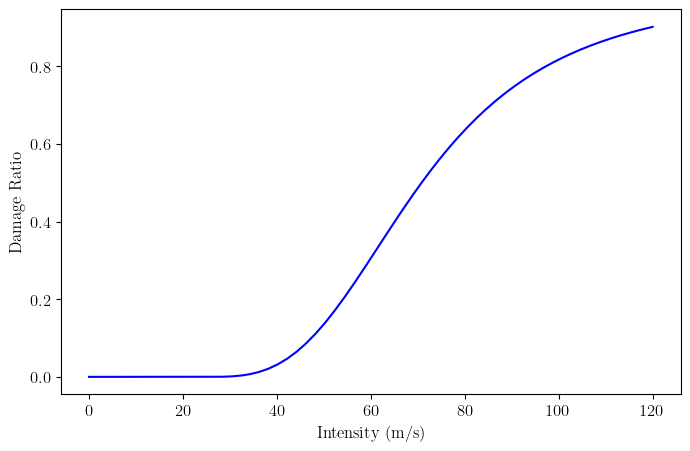

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(continuous_curves.index, continuous_curves["damage"], color="blue")
plt.xlabel("Intensity (m/s)")
plt.ylabel("Damage Ratio")
plt.show()